In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np
#np.seterr(over='ignore')
import scipy as sp

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import aplpy
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

/Users/martin/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
def gaussian2D(A, mu, sig, dims=(150,150)):
    x = np.linspace(0., 1., dims[0]+2)[1:-1]
    y = np.linspace(0., 1., dims[1]+2)[1:-1]
    X,Y = np.meshgrid(x,y)
    _X = X-mu[0]
    _Y = Y-mu[1]
    a = sig[0]; b=sig[1]; c=sig[2]
    return A * np.exp(- (a*_X**2 - 2*b*_X*_Y + c*_Y**2))

In [3]:
np.random.seed(0)

g0 = gaussian2D(0.20, [0.71,0.29], [400,20,200])
g1 = gaussian2D(0.20, [0.63,0.35], [600,75,50])
g2 = gaussian2D(0.22, [0.52,0.38], [100,20,200])
g3 = gaussian2D(0.13, [0.64,0.18], [800,10,900])
g4 = gaussian2D(0.17, [0.78,0.36], [1000,20,900])
g5 = gaussian2D(0.17, [0.725,0.42], [800,30,1000])
g6 = gaussian2D(0.17, [0.40,0.75], [100,20,70])
g7 = gaussian2D(0.21, [0.20,0.8], [80,20,100])

dims = (150,150)
noise_level = 0.01
noise = noise_level * np.abs(np.random.randn(*dims))
mean_noise = np.mean(noise)
rms_noise = estimate_rms(noise)
var_noise = np.std(noise)**2

data = g0+g1+g2+g3+g4+g5+g6+g7+noise
data -= data.min()
data /= data.max()

x = np.linspace(0., 1., data.shape[0]+2, endpoint=True)[1:-1]
y = np.linspace(0., 1., data.shape[1]+2, endpoint=True)[1:-1]
dfunc = RegularGridInterpolator((x,y), data, method='linear', bounds_error=False, fill_value=0.)

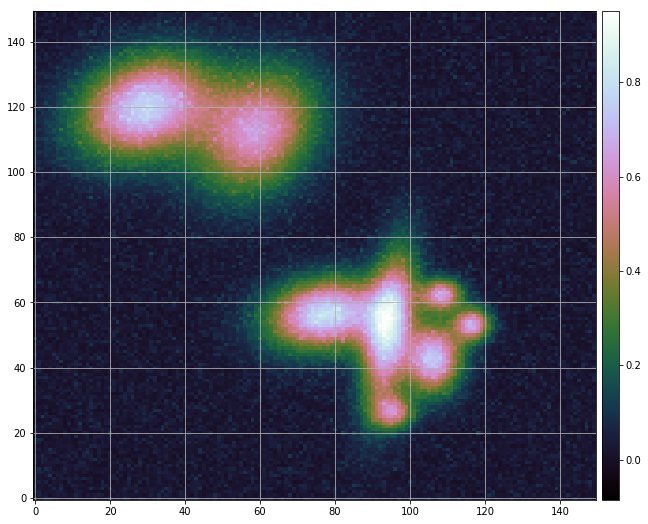

In [4]:
image_plot(data)

In [5]:
preprocessing(data)

interactive(children=(FloatSlider(value=0.21840985102963528, description='back_level', max=0.43681970205927056, min=0.010920492551481765, readout_format='.4f', step=0.004258992095077888), Output()), _dom_classes=('widget-interact',))

/Users/martin/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


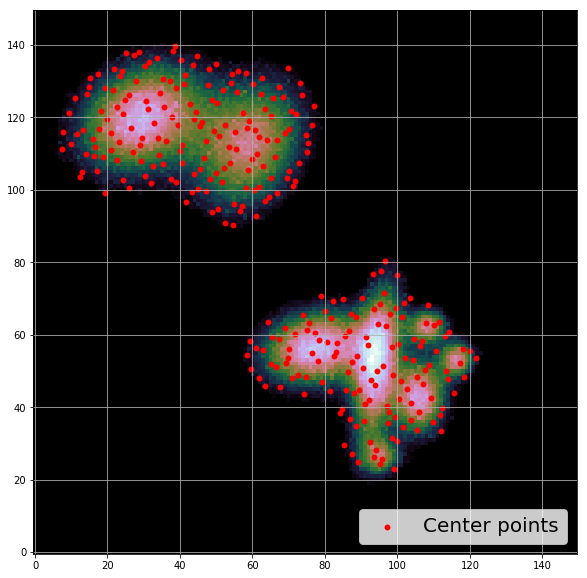

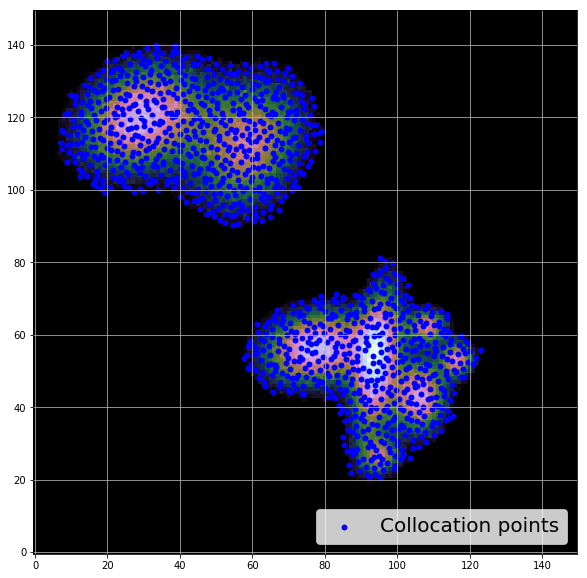

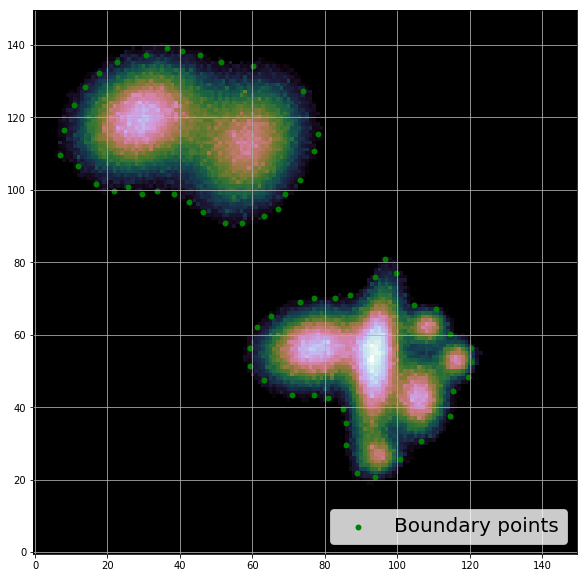

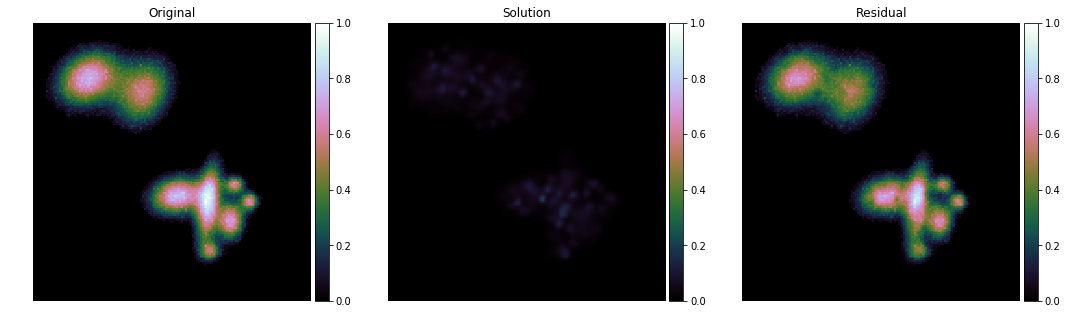

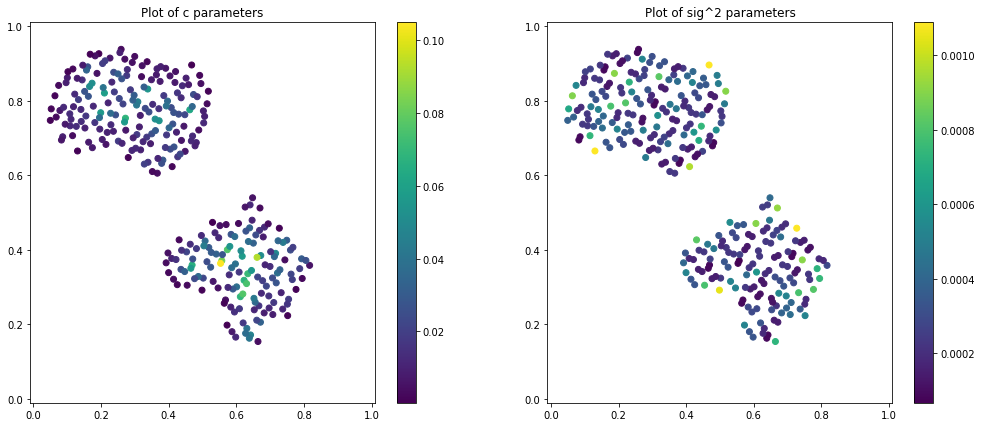

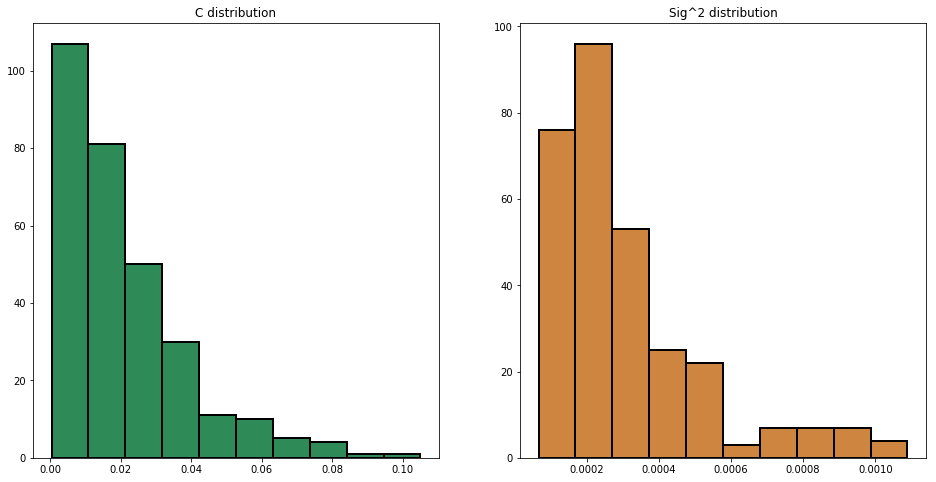

In [6]:
hdmc = HDMClouds(data, back_level=0.16, verbose=True, n_center=300)


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 93696

Residual stats:
Residual RMS: 0.026394001606189436
Residual Variance: 0.0006948604793044423
Flux Lost: 0.03286905275705154
Flux Addition: 0.02883759449580248
Exceeded Pixels: 2641
Total elapsed time: 526.0711898803711 [s]


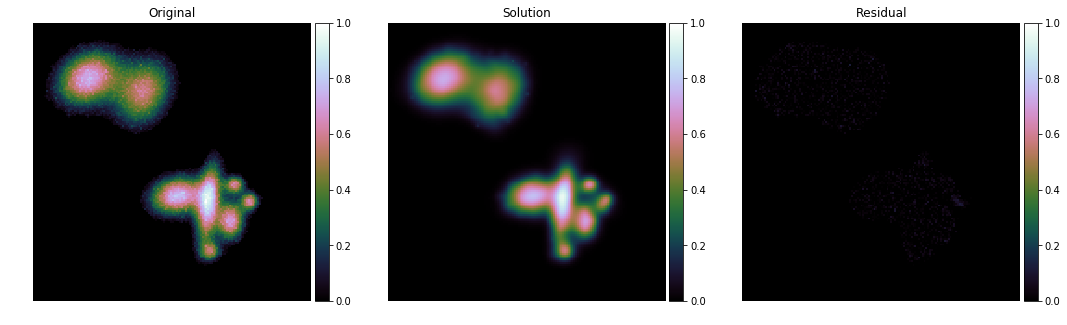

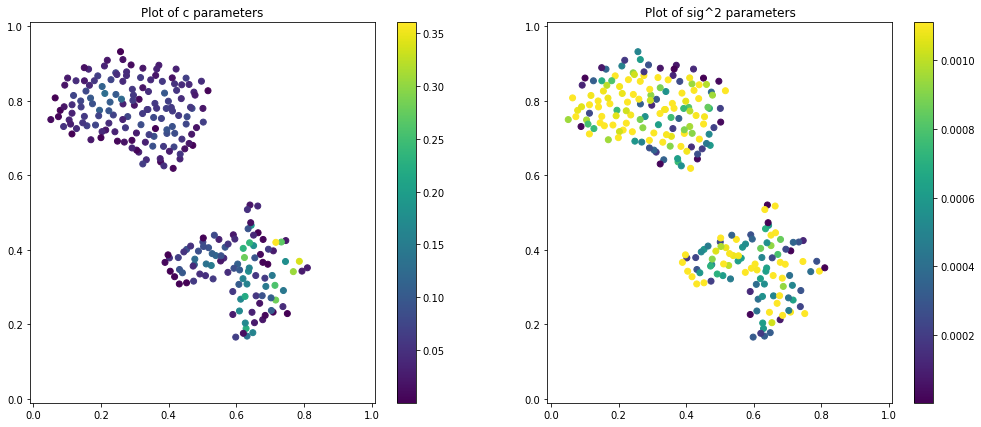

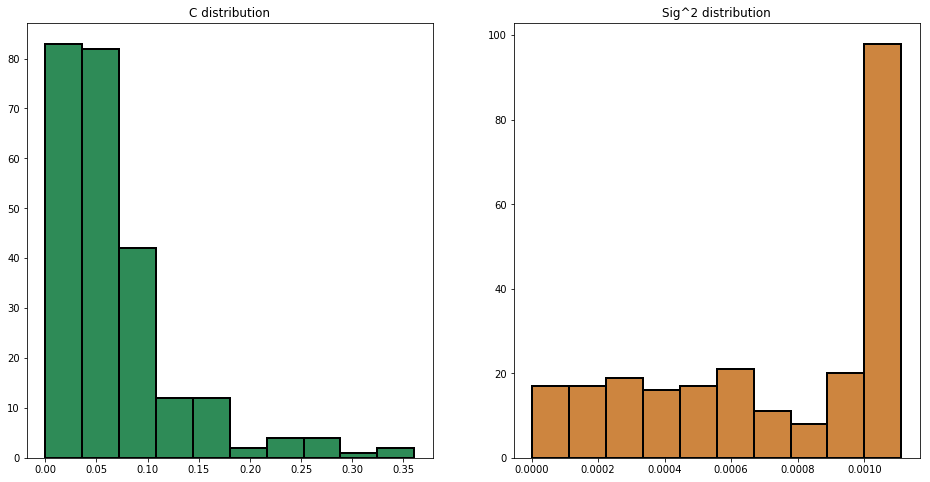

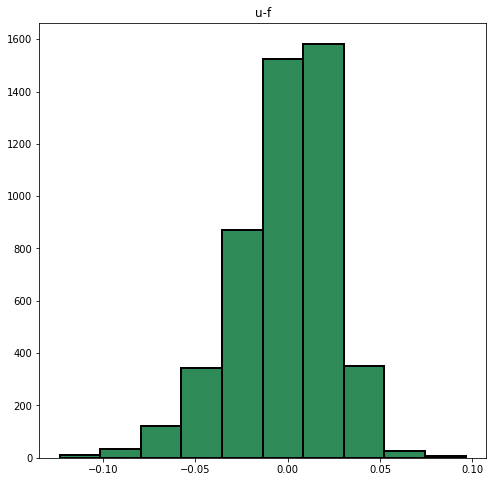

In [7]:
hdmc.build_gmr()
hdmc.summarize()

In [8]:
# retrieving real model parameters
xc, yc, c, sig = hdmc.get_params_mapped()
mu = np.vstack([xc,yc]).T

# GMR Step
sd, htree = gaussian_reduction(c, mu, sig, 1)

Merged components 37 and 195 with 3.4534406241175375e-06 KL dist and 3.3326897882005047e-11 ISD dist
Merged components 75 and 99 with 5.725657545510815e-06 KL dist and 2.0831630691275915e-10 ISD dist
Merged components 175 and 231 with 2.892513264551866e-05 KL dist and 2.656362893538322e-09 ISD dist
Merged components 2 and 118 with 3.0348803649007938e-05 KL dist and 3.900955725111288e-09 ISD dist
Merged components 147 and 226 with 4.1789047555862435e-05 KL dist and 1.5698974117905884e-07 ISD dist
Merged components 62 and 206 with 4.376994331598688e-05 KL dist and 5.152396488844815e-09 ISD dist
Merged components 96 and 186 with 4.476769847320985e-05 KL dist and 3.9112686249509476e-08 ISD dist
Merged components 28 and 83 with 7.512293501088507e-05 KL dist and 2.1509460879087783e-12 ISD dist
Merged components 106 and 155 with 9.76323693403355e-05 KL dist and 1.7392201109205432e-08 ISD dist
Merged components 121 and 199 with 0.0001903599886237256 KL dist and 4.872104248376807e-07 ISD dist
M

Merged components 22 and 274 with 0.01001374980797426 KL dist and 0.01734019462547054 ISD dist
Merged components 51 and 93 with 0.010276236987373455 KL dist and 3.113419169298304e-05 ISD dist
Merged components 112 and 150 with 0.010307228404363822 KL dist and 1.593618898176885e-05 ISD dist
Merged components 248 and 268 with 0.010637098983489524 KL dist and 0.0008619624197898634 ISD dist
Merged components 100 and 305 with 0.01073551980624965 KL dist and 0.0016172509662268908 ISD dist
Merged components 12 and 166 with 0.010822297423230709 KL dist and 3.88653626233193e-05 ISD dist
Merged components 263 and 310 with 0.011003382539919615 KL dist and 0.00027017450181054947 ISD dist
Merged components 111 and 189 with 0.011062827396187774 KL dist and 0.02792747700871201 ISD dist
Merged components 70 and 260 with 0.011222551235872014 KL dist and 0.001457364182956944 ISD dist
Merged components 108 and 284 with 0.012309919527356383 KL dist and 0.002204460641041628 ISD dist
Merged components 94 an

Merged components 337 and 401 with 0.07770782345716487 KL dist and 0.1516870612406791 ISD dist
Merged components 362 and 364 with 0.07960051384992384 KL dist and 0.01897579958983897 ISD dist
Merged components 110 and 400 with 0.08050210929501356 KL dist and 2.622941206893673 ISD dist
Merged components 53 and 378 with 0.08264291435007265 KL dist and 6.644016857793455 ISD dist
Merged components 6 and 404 with 0.08292138287630024 KL dist and 5.088609051469398 ISD dist
Merged components 57 and 351 with 0.08469317119433839 KL dist and 0.15489028315883147 ISD dist
Merged components 242 and 368 with 0.09427099237176395 KL dist and 0.3968753546796382 ISD dist
Merged components 79 and 370 with 0.09482058991177844 KL dist and 0.7653624574444606 ISD dist
Merged components 377 and 384 with 0.09504971431700993 KL dist and 0.034729205142836506 ISD dist
Merged components 391 and 423 with 0.09724768446330057 KL dist and 0.44708767036807373 ISD dist
Merged components 115 and 299 with 0.1012048083883159

In [10]:
htree

{244: (37, 195),
 245: (75, 99),
 246: (175, 231),
 247: (2, 118),
 248: (147, 226),
 249: (62, 206),
 250: (96, 186),
 251: (28, 83),
 252: (106, 155),
 253: (121, 199),
 254: (17, 250),
 255: (15, 120),
 256: (5, 214),
 257: (167, 209),
 258: (95, 211),
 259: (249, 252),
 260: (92, 229),
 261: (225, 255),
 262: (55, 244),
 263: (41, 253),
 264: (66, 137),
 265: (59, 141),
 266: (71, 128),
 267: (42, 218),
 268: (1, 82),
 269: (19, 98),
 270: (136, 246),
 271: (23, 86),
 272: (35, 193),
 273: (119, 168),
 274: (85, 127),
 275: (3, 235),
 276: (10, 162),
 277: (107, 132),
 278: (245, 259),
 279: (16, 65),
 280: (124, 202),
 281: (45, 216),
 282: (0, 232),
 283: (20, 177),
 284: (29, 203),
 285: (78, 236),
 286: (24, 87),
 287: (174, 269),
 288: (74, 154),
 289: (80, 237),
 290: (38, 61),
 291: (161, 217),
 292: (233, 254),
 293: (60, 142),
 294: (40, 179),
 295: (126, 205),
 296: (88, 158),
 297: (4, 258),
 298: (148, 201),
 299: (18, 97),
 300: (145, 204),
 301: (26, 182),
 302: (34, 

#### Structural Analysis

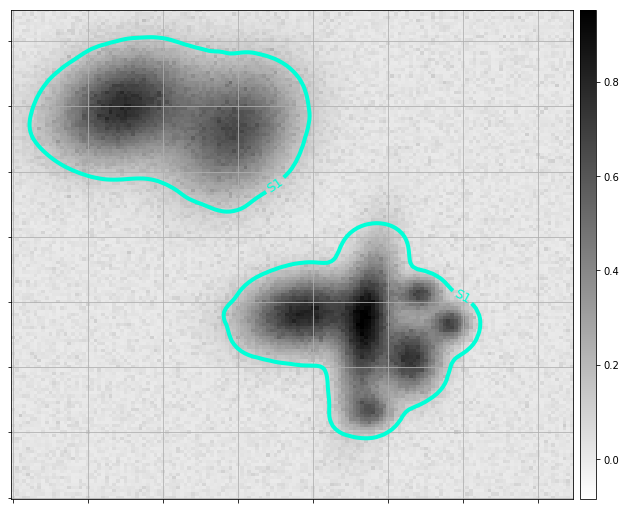

Next decomposition: (484, 485)


In [120]:
structs_plot(hdmc, [sd[486]],
             cmap1=plt.cm.gray_r,
             save_path=save_path+"decomp_1_synthetic_bw.eps")
print("Next decomposition:", htree[486])

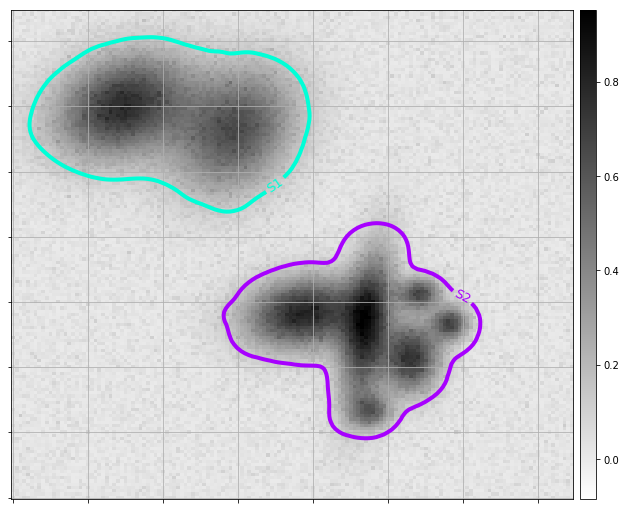

Next decomposition: (475, 483)


In [121]:
structs_plot(hdmc, [sd[484], sd[485]],
             cmap1=plt.cm.gray_r,
             save_path=save_path+"decomp_2_synthetic_bw.eps")
print("Next decomposition:", htree[485])

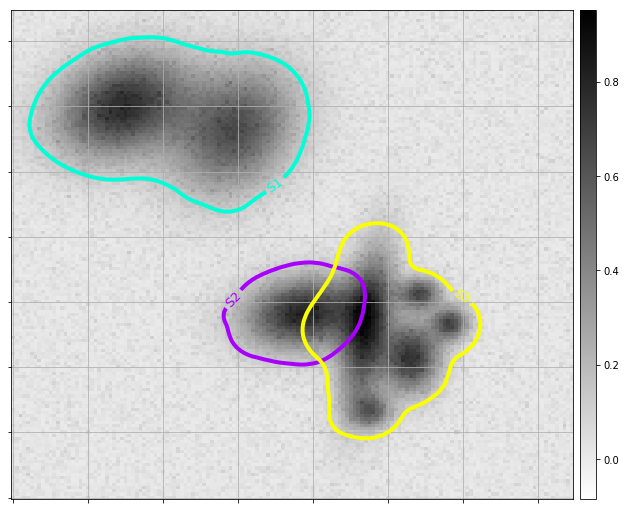

Next decomposition: (478, 480)


In [122]:
structs_plot(hdmc, [sd[484], sd[475], sd[483]], 
             cmap1=plt.cm.gray_r,
             save_path=save_path+"decomp_3_synthetic_bw.eps")
print("Next decomposition:", htree[484])

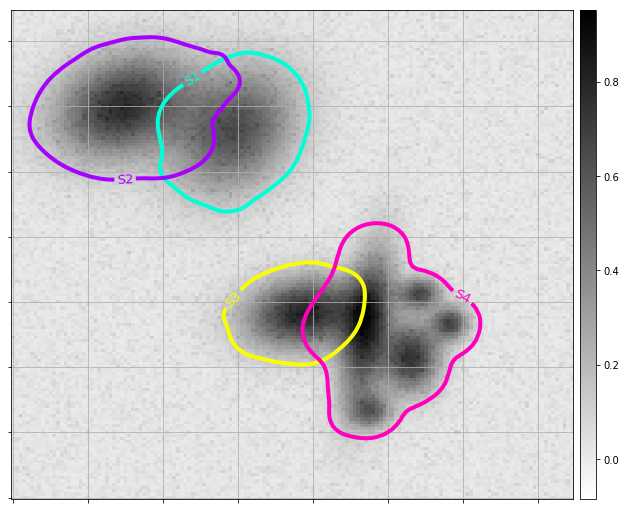

Next decomposition: (479, 482)


In [123]:
structs_plot(hdmc, [sd[478], sd[480], sd[475], sd[483]],
             cmap1=plt.cm.gray_r,
             save_path=save_path+"decomp_4_synthetic_bw.eps")
print("Next decomposition:", htree[483])

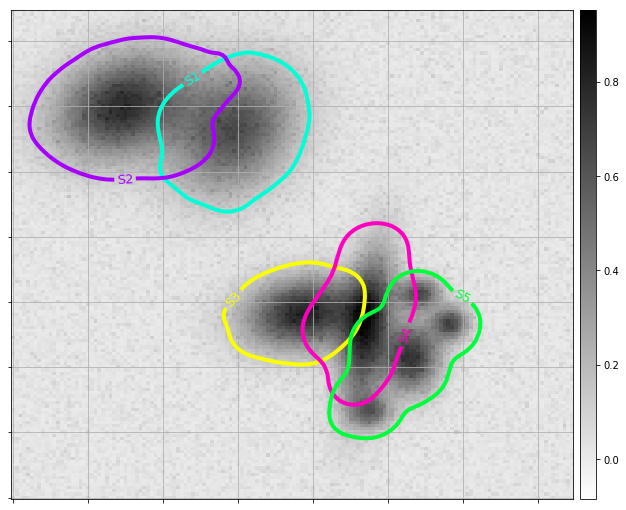

Next decomposition: (477, 481)


In [124]:
structs_plot(hdmc, [sd[478], sd[480], sd[475], sd[479], sd[482]],
             cmap1=plt.cm.gray_r,
            save_path=save_path+"decomp_5_synthetic_bw.eps")
print("Next decomposition:", htree[482])

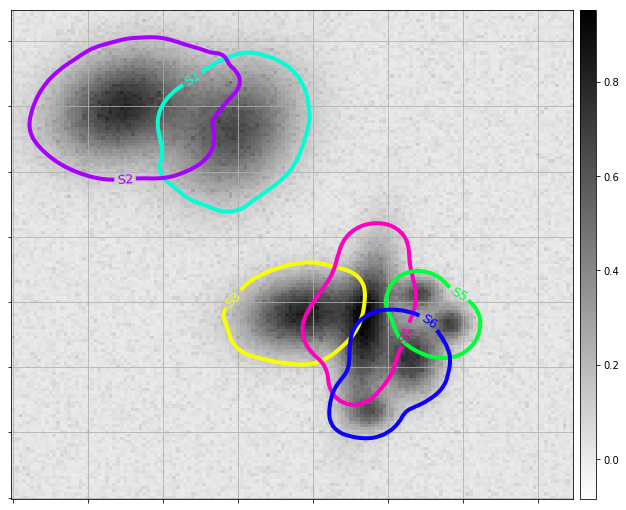

Next decomposition: (445, 467)


In [125]:
structs_plot(hdmc, [sd[478], sd[480], sd[475], sd[479], sd[477], sd[481]],
             cmap1=plt.cm.gray_r,
            save_path=save_path+"decomp_6_synthetic_bw.eps")
print("Next decomposition:", htree[481])

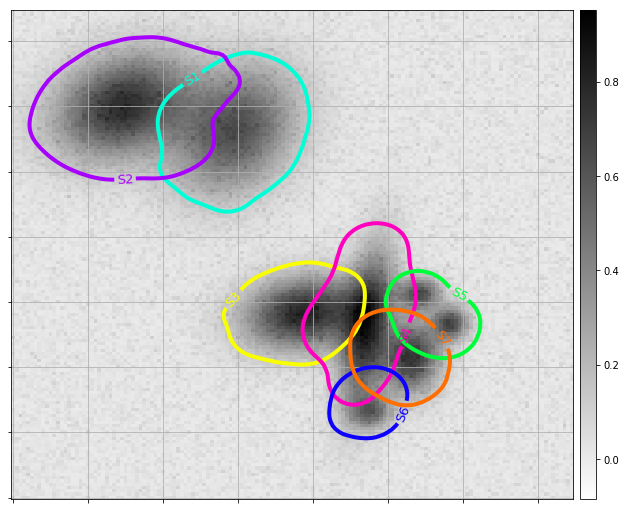

Next decomposition: (431, 458)


In [126]:
structs_plot(hdmc, [sd[478], sd[480], sd[475], sd[479], sd[477], sd[445], sd[467]],
             cmap1=plt.cm.gray_r,
            save_path=save_path+"decomp_7_synthetic_bw.eps")
print("Next decomposition:", htree[477])

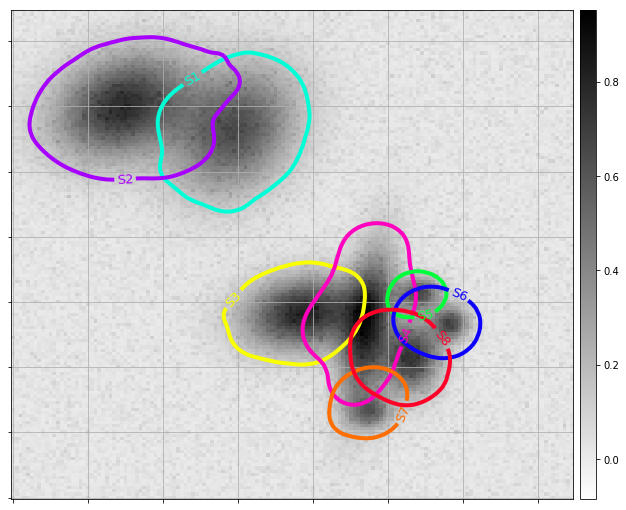

In [127]:
structs_plot(hdmc, [sd[478], sd[480], sd[475], sd[479], sd[431], sd[458], sd[445], sd[467]],
             cmap1=plt.cm.gray_r,
             save_path=save_path+"decomp_8_synthetic_bw.eps")